In [45]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import *
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.model_selection import *
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer

from sklearn.metrics import *

In [10]:
df = pd.read_csv("UCI_Credit_Card.csv")

In [11]:
df.head(5)

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0       0.0                           1  
1    1000.0       0.0    2000.0                           1  
2    1000.0    1000.0    5000.0                           0  
3    1100.0    1069.0    1000.0                           0  
4    9000.0     689.0     679.0                           0  

[5 rows x 25 columns]

In [12]:
df.shape

(30000, 25)

In [13]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [15]:
df.describe().T

count           mean            std       min  \
ID                          30000.0   15000.500000    8660.398374       1.0   
LIMIT_BAL                   30000.0  167484.322667  129747.661567   10000.0   
SEX                         30000.0       1.603733       0.489129       1.0   
EDUCATION                   30000.0       1.853133       0.790349       0.0   
MARRIAGE                    30000.0       1.551867       0.521970       0.0   
AGE                         30000.0      35.485500       9.217904      21.0   
PAY_0                       30000.0      -0.016700       1.123802      -2.0   
PAY_2                       30000.0      -0.133767       1.197186      -2.0   
PAY_3                       30000.0      -0.166200       1.196868      -2.0   
PAY_4                       30000.0      -0.220667       1.169139      -2.0   
PAY_5                       30000.0      -0.266200       1.133187      -2.0   
PAY_6                       30000.0      -0.291100       1.149988      -2.0   
BILL_AMT1                   30000.0   51223.330900   73635.860576 -165580.0   
BILL_AMT2                   30000.0   49179.075167   71173.768783  -69777.0   
BILL_AMT3                   30000.0   47013.154800   69349.387427 -157264.0   
BILL_AMT4                   30000.0   43262.948967   64332.856134 -170000.0   
BILL_AMT5                   30000.0   40311.400967   60797.155770  -81334.0   
BILL_AMT6                   30000.0   38871.760400   59554.107537 -339603.0   
PAY_AMT1                    30000.0    5663.580500   16563.280354       0.0   
PAY_AMT2                    30000.0    5921.163500   23040.870402       0.0   
PAY_AMT3                    30000.0    5225.681500   17606.961470       0.0   
PAY_AMT4                    30000.0    4826.076867   15666.159744       0.0   
PAY_AMT5                    30000.0    4799.387633   15278.305679       0.0   
PAY_AMT6                    30000.0    5215.502567   17777.465775       0.0   
default.payment.next.month  30000.0       0.221200       0.415062       0.0   

                                 25%       50%        75%        max  
ID                           7500.75   15000.5   22500.25    30000.0  
LIMIT_BAL                   50000.00  140000.0  240000.00  1000000.0  
SEX                             1.00       2.0       2.00        2.0  
EDUCATION                       1.00       2.0       2.00        6.0  
MARRIAGE                        1.00       2.0       2.00        3.0  
AGE                            28.00      34.0      41.00       79.0  
PAY_0                          -1.00       0.0       0.00        8.0  
PAY_2                          -1.00       0.0       0.00        8.0  
PAY_3                          -1.00       0.0       0.00        8.0  
PAY_4                          -1.00       0.0       0.00        8.0  
PAY_5                          -1.00       0.0       0.00        8.0  
PAY_6                          -1.00       0.0       0.00        8.0  
BILL_AMT1                    3558.75   22381.5   67091.00   964511.0  
BILL_AMT2                    2984.75   21200.0   64006.25   983931.0  
BILL_AMT3                    2666.25   20088.5   60164.75  1664089.0  
BILL_AMT4                    2326.75   19052.0   54506.00   891586.0  
BILL_AMT5                    1763.00   18104.5   50190.50   927171.0  
BILL_AMT6                    1256.00   17071.0   49198.25   961664.0  
PAY_AMT1                     1000.00    2100.0    5006.00   873552.0  
PAY_AMT2                      833.00    2009.0    5000.00  1684259.0  
PAY_AMT3                      390.00    1800.0    4505.00   896040.0  
PAY_AMT4                      296.00    1500.0    4013.25   621000.0  
PAY_AMT5                      252.50    1500.0    4031.50   426529.0  
PAY_AMT6                      117.75    1500.0    4000.00   528666.0  
default.payment.next.month      0.00       0.0       0.00        1.0

In [16]:
# Rename the target column and changing PAY_0 to PAY_1.
df.rename(columns={"default.payment.next.month" : "default", "PAY_0":"PAY_1"}, inplace=True)
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

In [17]:
for columns in ["SEX","EDUCATION","MARRIAGE"]:
    print(df[columns].value_counts())
    print("", end="\n")

2    18112
1    11888
Name: SEX, dtype: int64

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64



In [18]:
df["EDUCATION"] = np.where((df["EDUCATION"] == 5) | (df["EDUCATION"] == 6) | (df["EDUCATION"] == 0), 4, df["EDUCATION"])
print(df["EDUCATION"].value_counts())

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64


In [20]:
df["MARRIAGE"] = np.where(df["MARRIAGE"] == 0, 3, df["MARRIAGE"])
print(df["MARRIAGE"].value_counts())

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64


In [21]:
for column in df.columns:
    print(column, ":", df[column].nunique())


ID : 30000
LIMIT_BAL : 81
SEX : 2
EDUCATION : 4
MARRIAGE : 3
AGE : 56
PAY_1 : 11
PAY_2 : 11
PAY_3 : 11
PAY_4 : 11
PAY_5 : 10
PAY_6 : 10
BILL_AMT1 : 22723
BILL_AMT2 : 22346
BILL_AMT3 : 22026
BILL_AMT4 : 21548
BILL_AMT5 : 21010
BILL_AMT6 : 20604
PAY_AMT1 : 7943
PAY_AMT2 : 7899
PAY_AMT3 : 7518
PAY_AMT4 : 6937
PAY_AMT5 : 6897
PAY_AMT6 : 6939
default : 2


**"SEX", "EDUCATION", "MARRIAGE","PAY_1 TO PAY_6" are Categorical Columns and the rest are Numerical columns**

In [22]:
cat_columns = []
num_columns = []

for columns in df.columns:
    if df[columns].nunique() < 12:
        cat_columns.append(columns)
    else:
        num_columns.append(columns)
    
print("Categorical Columns Are : ", cat_columns)
print("Numerical Columns Are : ", num_columns)
     

Categorical Columns Are :  ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'default']
Numerical Columns Are :  ['ID', 'LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


In [23]:
num_columns.remove("ID")
cat_columns.remove("default")

print("Categorical Columns Are : ", cat_columns)
print("Numerical Columns Are : ", num_columns)

Categorical Columns Are :  ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
Numerical Columns Are :  ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


In [24]:
cat_columns

['SEX',
 'EDUCATION',
 'MARRIAGE',
 'PAY_1',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6']

In [25]:
X = df.drop(["ID", "default"], axis=1)
y = df["default"]

In [26]:
def evaluate_metrics(true, predicted):
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

In [30]:
models = {
    "Random Forest" : RandomForestClassifier(),
    "Logistic Regression" : LogisticRegression(),
    "SVM" : SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
}

In [31]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2023)
    
# we need to transform the numerical columns
transformer = ColumnTransformer([("Transformed", PowerTransformer(), num_columns)],remainder="passthrough" )
transformer.fit(X_train)

columns = num_columns+cat_columns
X_train = pd.DataFrame(transformer.transform(X_train), columns = columns)
X_test = pd.DataFrame(transformer.transform(X_test), columns = columns)

In [36]:
def evaluate_models(X, y, models):

    models_list = []
    report = pd.DataFrame()

    for name, model in models.items():
        model.fit(X, y)  # Train model

        # Make predictions
        y_train_pred = model.predict(X)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1, model_train_precision, \
        model_train_recall, model_train_rocauc_score = evaluate_metrics(y, y_train_pred)

        # Test set performance
        model_test_accuracy, model_test_f1, model_test_precision, \
        model_test_recall, model_test_rocauc_score = evaluate_metrics(y_test, y_test_pred)

        models_list.append(name)

        print(name)
        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1))
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))
        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

        print('\n')

    report['Model Name'] = models_list

    return report

In [38]:
report_1 = evaluate_models(X_train, y_train, models)

Random Forest
Model performance for Training set
- Accuracy: 0.9994
- F1 score: 0.9987
- Precision: 0.9987
- Recall: 0.9987
- Roc Auc Score: 0.9992
----------------------------------
Model performance for Test set
- Accuracy: 0.8202
- F1 score: 0.4687
- Precision: 0.6503
- Recall: 0.3664
- Roc Auc Score: 0.6560


Logistic Regression
Model performance for Training set
- Accuracy: 0.8065
- F1 score: 0.3593
- Precision: 0.6813
- Recall: 0.2440
- Roc Auc Score: 0.6057
----------------------------------
Model performance for Test set
- Accuracy: 0.8125
- F1 score: 0.3626
- Precision: 0.6867
- Recall: 0.2463
- Roc Auc Score: 0.6076


SVM
Model performance for Training set
- Accuracy: 0.8227
- F1 score: 0.4746
- Precision: 0.6963
- Recall: 0.3599
- Roc Auc Score: 0.6575
----------------------------------
Model performance for Test set
- Accuracy: 0.8255
- F1 score: 0.4672
- Precision: 0.6892
- Recall: 0.3533
- Roc Auc Score: 0.6547


Decision Tree
Model performance for Training set
- Accuracy

In [39]:
final_model = RandomForestClassifier()
final_model.fit(X_train, y_train)

RandomForestClassifier()

In [40]:
y_predicted = final_model.predict(X_test)

In [41]:
final_model.score(X_train, y_train)

0.9994166666666666

In [42]:
accuracy_score(y_test, y_predicted)

0.8193333333333334

In [43]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4701
           1       0.64      0.37      0.47      1299

    accuracy                           0.82      6000
   macro avg       0.74      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



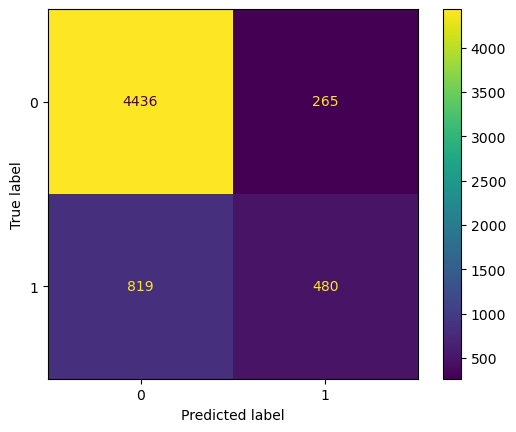

In [56]:
cm = confusion_matrix(y_test, y_predicted, labels=final_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_model.classes_)
disp.plot()

## Oversampling using SMOTE

In [57]:
over_sample = SMOTETomek(sampling_strategy="minority", random_state = 2023)

In [58]:
X_resample, y_resample = over_sample.fit_resample(X, y)

In [59]:
 # separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X_resample,y_resample,test_size=0.2,random_state=2023)
    
transformer = ColumnTransformer([("Transformed", PowerTransformer(), num_columns)],remainder="passthrough" )
transformer.fit(X_train)

columns = num_columns+cat_columns

X_train = pd.DataFrame(transformer.transform(X_train), columns = columns)
X_test = pd.DataFrame(transformer.transform(X_test), columns = columns)

In [60]:
report_2 = evaluate_models(X_train, y_train, models)

Random Forest
Model performance for Training set
- Accuracy: 0.9995
- F1 score: 0.9995
- Precision: 0.9994
- Recall: 0.9997
- Roc Auc Score: 0.9995
----------------------------------
Model performance for Test set
- Accuracy: 0.8451
- F1 score: 0.8439
- Precision: 0.8589
- Recall: 0.8295
- Roc Auc Score: 0.8453


Logistic Regression
Model performance for Training set
- Accuracy: 0.7341
- F1 score: 0.7315
- Precision: 0.7370
- Recall: 0.7262
- Roc Auc Score: 0.7341
----------------------------------
Model performance for Test set
- Accuracy: 0.7355
- F1 score: 0.7369
- Precision: 0.7399
- Recall: 0.7340
- Roc Auc Score: 0.7355


SVM
Model performance for Training set
- Accuracy: 0.7837
- F1 score: 0.7757
- Precision: 0.8034
- Recall: 0.7498
- Roc Auc Score: 0.7836
----------------------------------
Model performance for Test set
- Accuracy: 0.7734
- F1 score: 0.7696
- Precision: 0.7908
- Recall: 0.7495
- Roc Auc Score: 0.7737


Decision Tree
Model performance for Training set
- Accuracy

In [61]:
final_model = RandomForestClassifier()
final_model.fit(X_train, y_train)

RandomForestClassifier()

In [62]:
y_predicted = final_model.predict(X_test)

In [63]:
final_model.score(X_train, y_train)

0.9995596653456627

In [64]:
accuracy_score(y_test, y_predicted)

0.8466534566270365

In [65]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85      4498
           1       0.86      0.83      0.85      4586

    accuracy                           0.85      9084
   macro avg       0.85      0.85      0.85      9084
weighted avg       0.85      0.85      0.85      9084



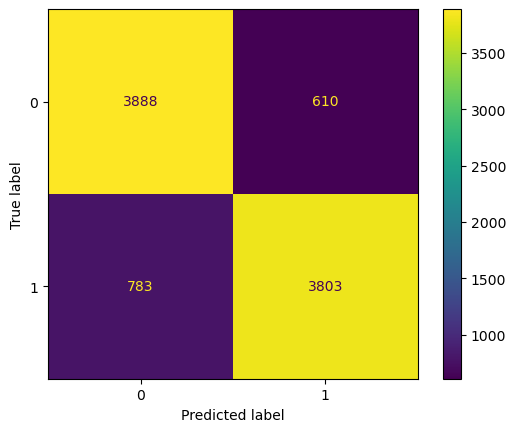

In [66]:
cm = confusion_matrix(y_test, y_predicted, labels=final_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_model.classes_)
disp.plot()

### Oversampling the minority resulted in the accuracy to 0.846

**Hence, we choose Random Forest as the final model**